In [69]:
# Import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

import conorm

In [70]:
# FUNCTIONS: 

# define a function that transforms the sample names to coherent condition names
def sample_to_condition(sample: str) -> str:
    """Transform individual sample name to coherent condition name."""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'
    else: 
        raise ValueError(f"Unknown sample name {sample}")

# 1 Import DElncRNA and DESeq data 

In [71]:
# read in DElncRNA data and interaction partners
lncrna = pd.read_csv('/home/maggy/LncRNA/9_1_dea_lncrna/9_1_1_deg_transcripts/deg_data/ranking_most_diff_lncrna_top3.csv', header=None)
partner = pd.read_csv('/home/maggy/LncRNA/10_lncRNA_classification/deg_lncrna_interaction_partners.txt', sep='\t')



In [72]:
# filter to only keep the rows of the DElncRNA and their interaction partners we are interested in 
partner = partner[partner['lncRNA_transcript'].str.lower().isin(lncrna[0])]

# 2 Import feature counts data

In [73]:
# import fetaure cpounts (gene expression data)
expression = pd.read_csv('/home/maggy/LncRNA/8_create_count_matrix/deg_geneid/gene_matrix_count.csv', sep=',', index_col=0)


In [74]:
# reorder the columns of the expression dataframes
# Specify the desired column order
column_order = ['N14', 'N15', 'N16', 'N17', 'N18', 'N21', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13']
# Reorder the dataframe columns
expression = expression.reindex(columns=column_order)
# filter the rows that have as a sum less than 50 counts
expression = expression[(expression.sum(axis=1) >= 50)]

In [75]:
# data normlization to get TMM data 
expression_tmm = conorm.tmm(expression)

In [76]:
expression_tmm

,N14,N15,N16,N17,N18,N21,A1,A2,A3,A4,A5,A6,R8,R9,R10,R11,R12,R13
Geneid,,,,,,,,,,,,,,,,,,
MSTRG.1,1041.596538,917.731585,1127.713808,852.793473,1039.983538,1018.206086,1318.930539,1409.587490,1488.636853,1523.600591,1400.224802,1348.119868,1132.386105,1241.472596,1121.025385,1036.872610,1069.434664,1027.754951
MSTRG.3,132.743001,153.766268,157.443644,142.132246,174.763074,171.185280,106.023355,124.344634,96.279995,132.890112,88.490043,117.947556,187.081271,168.705309,223.810697,184.594745,156.649585,187.495836
MSTRG.4,82.358796,116.784507,95.794024,82.590359,166.168169,69.265720,95.421020,110.760766,96.279995,120.528241,54.135085,96.220374,158.375679,117.101332,131.131378,122.735868,106.441384,118.052934
MSTRG.5,328.466257,328.943028,289.278984,287.145550,313.236548,346.328601,174.938536,203.758014,160.819333,195.729623,159.282078,194.510004,286.066070,263.974189,248.459452,270.018909,235.978541,231.145660
MSTRG.7,2.906781,7.785634,1.896911,3.841412,5.729937,5.937062,12.722803,16.718606,13.754285,18.542806,15.615890,12.415532,3.959392,6.946689,7.887602,4.909435,7.029148,7.936332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scaffold_72-g45758,5.813562,4.866021,8.536101,3.841412,15.279832,5.937062,5.301168,6.269477,0.000000,2.060312,2.082119,3.103883,10.888328,9.923842,6.901651,10.800756,7.029148,3.968166
scaffold_72-g45759,20.347467,13.624859,11.381468,8.643177,18.144800,19.790206,23.325138,20.898258,29.624614,25.753898,21.862246,22.761809,22.766504,28.779141,30.564456,31.420382,23.095772,17.856746
scaffold_72-g45760,18.409613,16.544472,15.175291,7.682824,14.324842,11.874123,22.264905,32.392300,22.218460,26.784054,24.985424,21.727181,31.675136,30.763909,26.620656,32.402269,26.108264,22.816954


In [77]:
partner['partnerRNA_gene']

15      ccar_ua05-g5569
16      ccar_ua05-g5569
17      ccar_ua05-g5569
18      ccar_ua05-g5569
74      ccar_ua05-g5594
             ...       
4776    ccar_ua04-g5072
4777    ccar_ua04-g5071
4778    ccar_ua04-g5071
4779    ccar_ua04-g5072
4788    ccar_ua04-g4801
Name: partnerRNA_gene, Length: 241, dtype: object

In [78]:
# filter expression df for top three DElncRNA
tmm_lnc = expression_tmm[expression_tmm.index.str.lower().isin(partner['partnerRNA_gene'])]
# reset index 
tmm_lnc.reset_index(inplace=True)

In [79]:
tmm_lnc

,Geneid,N14,N15,N16,N17,N18,N21,A1,A2,A3,A4,A5,A6,R8,R9,R10,R11,R12,R13
0,ccar_ua01-g315,6.782489,6.812430,12.329924,2.881059,0.954989,2.968531,1.060234,0.000000,0.000000,6.180935,0.000000,1.034628,2.969544,0.000000,4.929751,7.855096,1.004164,2.976124
1,ccar_ua04-g4801,56.197767,67.151092,79.670277,80.669653,63.984295,57.391597,126.167793,98.221812,84.641754,82.412473,93.695340,103.462768,120.761455,135.956631,126.201626,103.098129,92.383088,107.140478
2,ccar_ua04-g4976,5.813562,9.732042,3.793823,4.801765,10.504884,10.884613,3.180701,5.224564,6.348132,6.180935,11.451653,11.380904,4.949240,1.984768,6.901651,4.909435,7.029148,3.968166
3,ccar_ua05-g5303,88.172358,105.106056,120.453872,92.193889,99.318905,115.772704,122.987092,89.862509,89.931864,107.136215,111.393349,108.635906,111.852823,86.337423,105.496672,75.605294,78.324792,94.243939
4,ccar_ua05-g5426,5.813562,7.785634,10.433013,3.841412,36.289600,16.821675,9.542102,11.494042,11.638241,2.060312,7.287415,8.277021,9.898480,6.946689,10.845452,8.836982,8.033312,12.896539
5,ccar_ua05-g5498,145.339052,185.882007,128.041517,146.934011,170.943116,176.132831,83.758451,73.143902,82.525710,105.075903,105.146993,84.839470,80.177688,71.451660,69.016514,78.550955,89.370596,80.355358
6,ccar_ua05-g5603,1.937854,2.919613,14.226835,9.603530,15.279832,1.979021,4.240934,8.359303,3.174066,6.180935,4.164237,5.173138,7.918784,4.961921,7.887602,9.818869,10.041640,13.888580
7,ccar_ua05-g5604,3.875708,2.919613,3.793823,5.762118,2.864968,2.968531,0.000000,2.089826,1.058022,0.000000,3.123178,3.103883,1.979696,1.984768,3.943801,4.909435,1.004164,5.952249
8,ccar_ua05-g5622,19.378540,15.571268,18.020658,20.167413,29.604674,18.800695,21.204671,19.853345,15.870329,24.723742,19.780127,23.796437,13.857872,17.862915,15.775203,15.710191,15.062460,13.888580
9,ccar_ua05-g5623,0.968927,0.000000,2.845367,2.881059,1.909979,1.979021,3.180701,7.314390,5.290110,8.241247,4.164237,2.069255,3.959392,6.946689,5.915701,6.873209,4.016656,11.904498


In [80]:
# convert from long to short format
tmm_lnc = tmm_lnc.melt(id_vars='Geneid', var_name='sample', value_name='measurement')
# write uniform sample name for each condition 
tmm_lnc['condition'] = tmm_lnc['sample'].apply(sample_to_condition)
tmm_lnc

,Geneid,sample,measurement,condition
0,ccar_ua01-g315,N14,6.782489,Normoxia
1,ccar_ua04-g4801,N14,56.197767,Normoxia
2,ccar_ua04-g4976,N14,5.813562,Normoxia
3,ccar_ua05-g5303,N14,88.172358,Normoxia
4,ccar_ua05-g5426,N14,5.813562,Normoxia
...,...,...,...,...
301,ccar_ua05-g5670,R13,4.960207,Reoxygenation
302,ccar_ua05-g5711,R13,129.957431,Reoxygenation
303,ccar_ua05-g5727,R13,19.840829,Reoxygenation
304,ccar_ua05-g5780,R13,20.832871,Reoxygenation


# 3 Normalization of data

In [81]:
grouped = tmm_lnc.groupby(['Geneid'])

tmm_norm = []

for gene_id, data in grouped: 
    # calculate the mean for normoxia
    mean = data.loc[data.condition == 'Normoxia', 'measurement']
    if len(mean) == 0: 
        continue
    mean = mean.mean() 
    # calculate the geomean in normoxia 
    geomean = stats.gmean(data.loc[data.condition == 'Normoxia', 'measurement'])
    # write the calculated mean into a new column
    data["norm_average"] = mean
    # Determination of relative deviation
    data["rel_deviation"] = data["measurement"]/mean
    tmm_norm.append(data)
tmm_norm = pd.concat(tmm_norm)
tmm_norm

,Geneid,sample,measurement,condition,norm_average,rel_deviation
0,ccar_ua01-g315,N14,6.782489,Normoxia,5.454904,1.243375
17,ccar_ua01-g315,N15,6.812430,Normoxia,5.454904,1.248863
34,ccar_ua01-g315,N16,12.329924,Normoxia,5.454904,2.260338
51,ccar_ua01-g315,N17,2.881059,Normoxia,5.454904,0.528159
68,ccar_ua01-g315,N18,0.954989,Normoxia,5.454904,0.175070
...,...,...,...,...,...,...
237,ccar_ua05-g5875,R9,115.116564,Reoxygenation,89.602221,1.284751
254,ccar_ua05-g5875,R10,111.412373,Reoxygenation,89.602221,1.243411
271,ccar_ua05-g5875,R11,111.935111,Reoxygenation,89.602221,1.249245
288,ccar_ua05-g5875,R12,137.570469,Reoxygenation,89.602221,1.535347


# Significance test 

In [82]:
from scipy.stats import f_oneway
from scipy.stats import alexandergovern

# test if expression changes are significant 
def stats_test(data: pd.DataFrame):
    grouped = data.groupby('Geneid')
    anova_results = pd.DataFrame(columns=['F', 'p'])
    for geneid, data in grouped: 
        if data['rel_deviation'].isna().all(): 
            continue
        samples=[]
        std_dev=[]
        for _, sample in data.groupby('condition'):
            samples.append(sample['rel_deviation'])
            std_dev.append(sample['rel_deviation'].std())
        if np.all(np.isclose(std_dev, np.mean(std_dev), rtol=0.5)):
            test='anova'
            res = f_oneway(*samples)
        else:
            test= 'alexander-govern'
            res = alexandergovern(*samples)
        F,p = res.statistic, res.pvalue
        anova_results.loc[geneid, 'F'] = F
        anova_results.loc[geneid, 'p'] = p
        anova_results.loc[geneid, 'Test'] = test
    return anova_results

In [83]:
# apply the defines significance test onto the dataframe 
stat_res = stats_test(tmm_norm)
stat_res

,F,p,Test
ccar_ua01-g315,2.450903,0.119947,anova
ccar_ua04-g4801,16.173115,0.00018,anova
ccar_ua04-g4976,1.50297,0.254136,anova
ccar_ua05-g5303,1.673692,0.220739,anova
ccar_ua05-g5426,1.051871,0.591002,alexander-govern
ccar_ua05-g5498,16.764883,0.000229,alexander-govern
ccar_ua05-g5603,5.132316,0.07683,alexander-govern
ccar_ua05-g5604,3.296593,0.065059,anova
ccar_ua05-g5622,10.414186,0.005478,alexander-govern
ccar_ua05-g5623,7.110153,0.006731,anova


In [84]:
from scipy.stats import tukey_hsd
from scipy.stats import mannwhitneyu

# perform post-hoc test 
def posthoc_test(data: pd.DataFrame): 
    grouped = data.groupby('Geneid')
    posthoc_results = pd.DataFrame(index=data['Geneid'].unique())
    for geneid, data in grouped: 
        if data['rel_deviation'].isna().all(): 
            continue
        samples=[]
        groups = list(data.groupby('condition').groups.keys())
        names = []
        for i in groups: 
            for j in groups: 
                names.append('p ' + i+j)
        for name, sample in data.groupby(['condition']):
            samples.append(sample['rel_deviation'])
        test = 'tukey_hsd'
        res = tukey_hsd(*samples)
        posthoc_results.loc[geneid,names] = res.pvalue.flatten()
    return posthoc_results


In [85]:
post_res = posthoc_test(tmm_norm)
post_res.drop(columns=['p AnoxiaAnoxia', 'p ReoxygenationReoxygenation', 'p NormoxiaNormoxia', 'p AnoxiaNormoxia', 'p ReoxygenationNormoxia', 'p ReoxygenationNormoxia', 'p ReoxygenationAnoxia'], inplace=True)
post_res

,p AnoxiaReoxygenation,p NormoxiaAnoxia,p NormoxiaReoxygenation
ccar_ua01-g315,0.566033,0.101349,4.848906e-01
ccar_ua04-g4801,0.163174,0.006129,1.416994e-04
ccar_ua04-g4976,0.363186,0.982947,2.833911e-01
ccar_ua05-g5303,0.248101,0.980091,3.277530e-01
ccar_ua05-g5426,0.957479,0.468250,6.339375e-01
ccar_ua05-g5498,0.456227,0.000003,5.123628e-07
ccar_ua05-g5603,0.264072,0.571055,8.214493e-01
ccar_ua05-g5604,0.156254,0.070166,8.931088e-01
ccar_ua05-g5622,0.036441,0.949249,6.524071e-02
ccar_ua05-g5623,0.476562,0.059648,5.770512e-03


# 5 PLOT (Barplot)

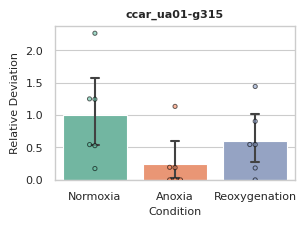

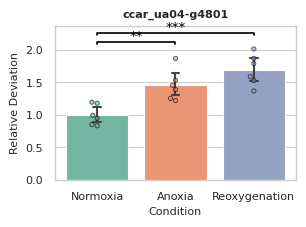

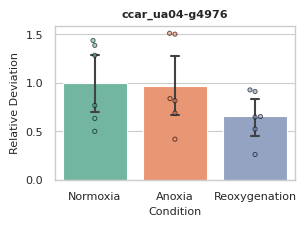

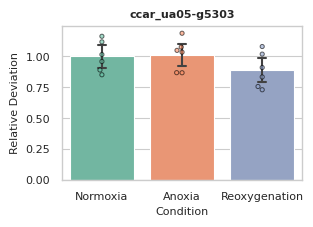

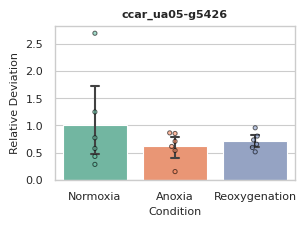

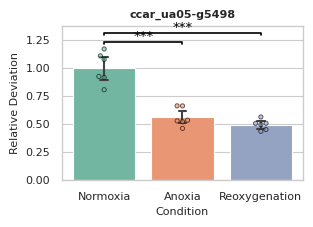

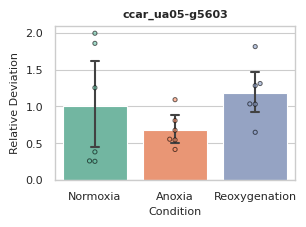

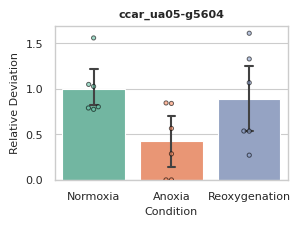

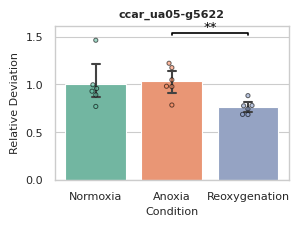

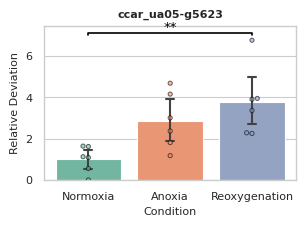

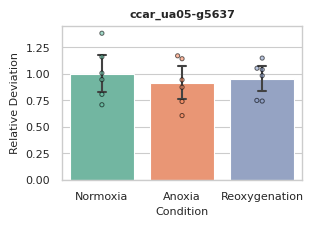

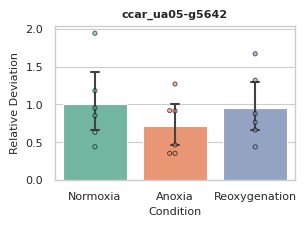

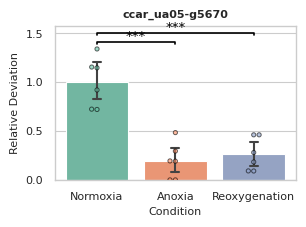

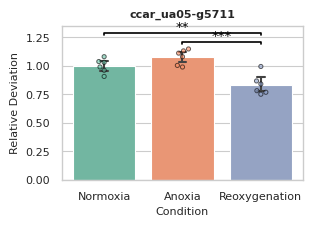

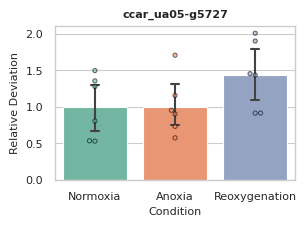

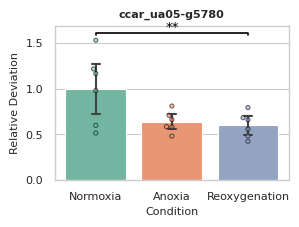

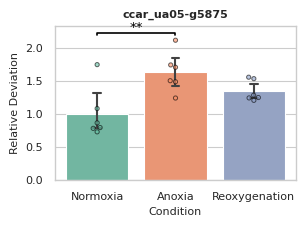

In [86]:
# define sig list 
sig_list = {'p AnoxiaReoxygenation': (1,2),
            'p NormoxiaAnoxia': (0,1),
            'p NormoxiaReoxygenation': (0,2)}

def sig_cat(s):
    if s < 0.0027:
        return "***"
    if s < 0.0455:
        return "**"
    
# set sns colorpallete to colorblind 
sns.set_theme(palette='Set2', style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})

for geneid, data in tmm_norm.groupby('Geneid'): 
    if np.any(stat_res.loc[geneid, 'Test'] == ''):
        continue
    # PLOT
    plt.figure(figsize=(8/2.54, 6/2.54))
    g = sns.barplot(data=data, x='condition', y='rel_deviation', capsize=0.1, err_kws={"linewidth": 1.5}, hue='condition', legend=False)
    sns.swarmplot(data=data, x='condition', y='rel_deviation', size=3, ax=g, 
                  dodge=False, legend=False, linewidth=0.7, edgecolor="k", alpha=0.6, hue='condition')
    # significance bars 
    x_pos = np.array([p.get_x() for p in g.patches])
    x_width = np.array([p.get_width() for p in g.patches])
    x_pos = x_pos + (x_width/2)
    y, h, col = data['rel_deviation'].max() * 1.04, data['rel_deviation'].max() * 0.01, 'k'
    offset=0
    sig_info = post_res.loc[geneid, sig_list.keys()]
    sig_info = sig_info.loc[sig_info <= 0.05]
    for name, value in sig_info.items():
        height= np.array([y, y+h, y+h, y]) + offset
        x1, x2 = x_pos[list(sig_list[name])]
        plt.plot([x1, x1, x2, x2], height, lw=1.2, c=col)
        plt.text((x1+x2)*.5, y+h+offset, sig_cat(value), ha='center', va='bottom', color=col)
        offset += data['rel_deviation'].max() * 0.07    
    plt.title(geneid, fontdict={'weight': 'bold'}, fontsize=8)
    #plt.ylim(top=1.6)
    plt.ylabel('Relative Deviation')
    plt.xlabel('Condition')

    plt.tight_layout()
    plt.show()
    plt.close()
